L= [2.72073297 1.22179954 0.00505605 0.05241145]
A= [[ 0.48727267  0.52733742  0.48528898 -0.49897415]
 [ 0.5105362   0.47399677 -0.47382714  0.53867216]
 [ 0.50831859 -0.48074769 -0.50632338 -0.50411358]
 [ 0.49348793 -0.51587204  0.532559    0.45467198]]


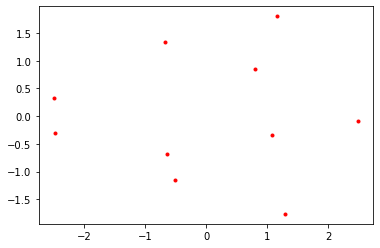

In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

x1 = [86, 71, 42, 62, 96, 39, 50, 78, 51, 89] 
x2 = [79, 75, 43, 58, 97, 33, 53, 66, 44, 92]
x3 = [67, 78, 39, 98, 61, 45, 64, 52, 76, 93]
x4 = [68, 84, 44, 95, 63, 50, 72, 47, 72, 91]


x1h = (x1-np.mean(x1))/np.std(x1, ddof=1)
x2h = (x2-np.mean(x2))/np.std(x2, ddof=1)
x3h = (x3-np.mean(x3))/np.std(x3, ddof=1)
x4h = (x4-np.mean(x4))/np.std(x4, ddof=1)

COV = np.cov([x1h, x2h, x3h, x4h])
L, A = np.linalg.eig(COV)

z1 = A[0,0] * (x1h-np.mean(x1h)) + A[1,0] * (x2h-np.mean(x2h)) + A[2,0] * (x3h-np.mean(x3h)) + A[3,0] * (x4h-np.mean(x4h))
z2 = A[0,1] * (x1h-np.mean(x1h)) + A[1,1] * (x2h-np.mean(x2h)) + A[2,1] * (x3h-np.mean(x3h)) + A[3,1] * (x4h-np.mean(x4h))


frame = pd.DataFrame({'X1' : x1, 'X2' : x2, 'x3' : x3, 'x4' : x4, 'x1h':x1h, 'x2h':x2h, 'x3h':x3h, 'x4h':x4h, 'z1':z1, 'z2':z2})
frame = frame.assign(z1_order=len(frame.z1) - stats.mstats.rankdata(frame.z1)+1)
frame = frame.assign(z2_order=len(frame.z2) - stats.mstats.rankdata(frame.z2)+1)
rate = L/np.sum(L)#寄与率を求める配列
#データフレームへ変換
df_rate = pd.DataFrame(data = rate, 
                      columns = ['寄与率'],
                      index = ["主成分{}".format(x+1) for x in range(4)])
print("L=", L)
print("A=", A)
plt.plot(z1, z2, '.', color = 'red')

In [41]:
df_rate

,寄与率
主成分1,0.680183
主成分2,0.305450
主成分3,0.001264
主成分4,0.013103


Text(0, 0.5, 'Cumulative contribution rate')

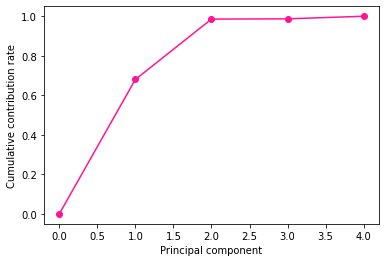

In [43]:
# 寄与率を累積する
ruiseki = np.cumsum(rate)

# 0を連結
ruiseki = np.hstack([0, ruiseki])
ruiseki
# グラフを描画
plt.plot(ruiseki, "-o", color = 'deeppink')
plt.xlabel("Principal component")
plt.ylabel("Cumulative contribution rate")

In [28]:
frame

,X1,X2,x3,x4,x1h,x2h,x3h,x4h,z1,z2,z1_order,z2_order
0,86,79,67,68,0.954063,0.695858,-0.015489,-0.033377,0.795805,0.857612,5.0,3.0
1,71,75,78,84,0.223913,0.510296,0.552456,0.856673,1.073212,-0.347569,4.0,7.0
2,42,43,39,44,-1.187711,-0.974201,-1.461168,-1.368451,-2.494157,0.320306,10.0,4.0
3,62,58,98,95,-0.214177,-0.278343,1.585083,1.468582,1.283987,-1.764503,2.0,10.0
4,96,97,61,63,1.440830,1.530887,-0.325278,-0.311517,1.164576,1.802518,3.0,1.0
5,39,33,45,50,-1.333741,-1.438106,-1.151379,-1.034683,-2.479972,-0.297702,9.0,6.0
6,50,53,64,72,-0.798297,-0.510296,-0.170384,0.189136,-0.642786,-0.678509,7.0,8.0
7,78,66,52,47,0.564649,0.092781,-0.789960,-1.201567,-0.672004,1.341365,8.0,2.0
8,51,44,76,72,-0.749621,-0.927810,0.449193,0.189136,-0.517281,-1.148600,6.0,9.0
9,89,92,93,91,1.100093,1.298935,1.326926,1.246069,2.488620,-0.084918,1.0,5.0


In [16]:
frame2 = pd.DataFrame({'Japanese' : x1h, 'English' : x2h, 'Math' : x3h, 'Seience' : x4h})
frame2

,Japanese,English,Math,Seience
0,0.954063,0.695858,-0.015489,-0.033377
1,0.223913,0.510296,0.552456,0.856673
2,-1.187711,-0.974201,-1.461168,-1.368451
3,-0.214177,-0.278343,1.585083,1.468582
4,1.440830,1.530887,-0.325278,-0.311517
5,-1.333741,-1.438106,-1.151379,-1.034683
6,-0.798297,-0.510296,-0.170384,0.189136
7,0.564649,0.092781,-0.789960,-1.201567
8,-0.749621,-0.927810,0.449193,0.189136
9,1.100093,1.298935,1.326926,1.246069


array([[<AxesSubplot:xlabel='Japanese', ylabel='Japanese'>,
        <AxesSubplot:xlabel='English', ylabel='Japanese'>,
        <AxesSubplot:xlabel='Math', ylabel='Japanese'>,
        <AxesSubplot:xlabel='Seience', ylabel='Japanese'>],
       [<AxesSubplot:xlabel='Japanese', ylabel='English'>,
        <AxesSubplot:xlabel='English', ylabel='English'>,
        <AxesSubplot:xlabel='Math', ylabel='English'>,
        <AxesSubplot:xlabel='Seience', ylabel='English'>],
       [<AxesSubplot:xlabel='Japanese', ylabel='Math'>,
        <AxesSubplot:xlabel='English', ylabel='Math'>,
        <AxesSubplot:xlabel='Math', ylabel='Math'>,
        <AxesSubplot:xlabel='Seience', ylabel='Math'>],
       [<AxesSubplot:xlabel='Japanese', ylabel='Seience'>,
        <AxesSubplot:xlabel='English', ylabel='Seience'>,
        <AxesSubplot:xlabel='Math', ylabel='Seience'>,
        <AxesSubplot:xlabel='Seience', ylabel='Seience'>]], dtype=object)

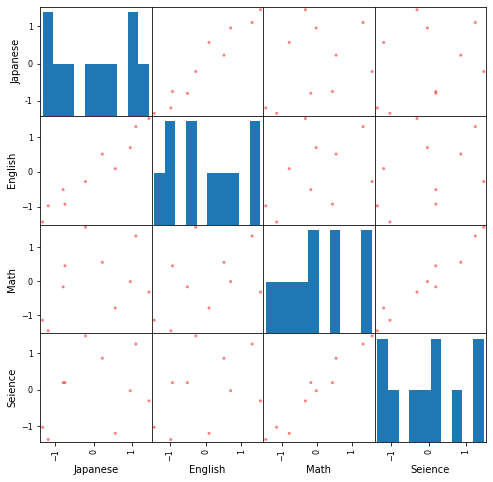

In [17]:
pd.plotting.scatter_matrix(frame2, alpha=0.5, figsize=(8, 8), color = 'red')

In [19]:
import sklearn
from sklearn.decomposition import PCA

frame3 = pd.DataFrame({'Japanese' : x1, 'English' : x2, 'Math' : x3, 'Science' : x4})
pca = PCA()
pca.fit(frame3)
value = pca.transform(frame3)
frame3

,Japanese,English,Math,Science
0,86,79,67,68
1,71,75,78,84
2,42,43,39,44
3,62,58,98,95
4,96,97,61,63
5,39,33,45,50
6,50,53,64,72
7,78,66,52,47
8,51,44,76,72
9,89,92,93,91


In [20]:
frame4 = pd.DataFrame(data = value, columns = ["主成分{}".format(x+1) for x in range(len(frame3.columns))])
frame4

,主成分1,主成分2,主成分3,主成分4
0,-19.187093,-15.143554,2.537514,2.387314
1,-19.848279,8.362033,-5.393193,0.919618
2,47.996794,-10.933885,-3.898519,-1.992359
3,-18.101127,36.816682,3.417424,0.111264
4,-30.650014,-33.016214,-2.541704,-0.505954
5,50.515897,1.213425,0.142488,1.288986
6,15.565219,11.630857,-5.837654,0.882559
7,7.818230,-26.824010,7.646758,-0.291327
8,15.025069,21.706076,5.136288,-1.059297
9,-49.134695,6.188591,-1.209401,-1.740805


In [21]:
# モデルpcaの寄与率を算出
ev_ratio = pca.explained_variance_ratio_
ev_ratio

array([0.68897032, 0.29653683, 0.01326883, 0.00122403])

In [22]:
df_evr = pd.DataFrame(data = ev_ratio, 
                      columns = ['寄与率'],
                      index = ["主成分{}".format(x+1) for x in range(len(frame3.columns))])
df_evr

,寄与率
主成分1,0.688970
主成分2,0.296537
主成分3,0.013269
主成分4,0.001224


Text(0, 0.5, 'ruiseki_kiyoritu')

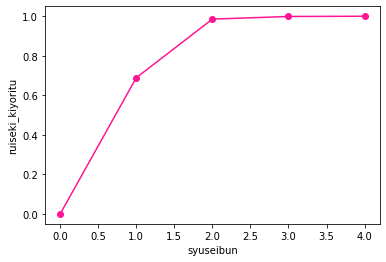

In [24]:
# 寄与率を累積する
cc_ratio = np.cumsum(ev_ratio)

# 0を連結
cc_ratio = np.hstack([0, cc_ratio])

# グラフを描画
plt.plot(cc_ratio, "-o", color = 'deeppink')
plt.xlabel("syuseibun")
plt.ylabel("ruiseki_kiyoritu")